In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from Reading import read_and_smooth, our_lord_and_saviour_fourier

In [20]:
frekvencije_duo = []
delta = []

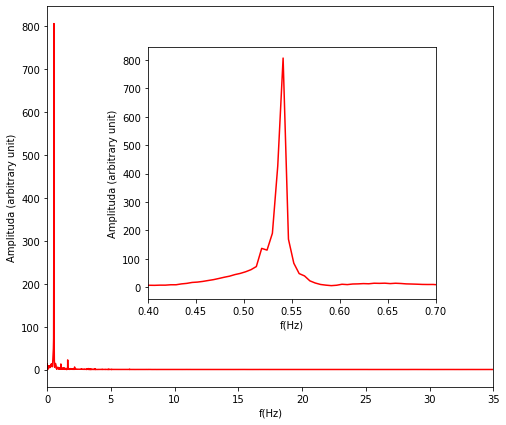

In [34]:
time1, red_ready, blue_ready = read_and_smooth("udarni_prozivoljni_3.csv")

four, freqs, PDS = our_lord_and_saviour_fourier(time1, red_ready)

indeks = np.where(PDS > 400)
temp1, temp2 = 2 * np.pi * abs(freqs[indeks][0]), 2 * np.pi * abs(freqs[indeks][1])
frekvencije_duo.append([temp1, temp2])
delta.append(abs(temp2-temp1))

fig, ax = plt.subplots(figsize=[8,7])

plt.plot(freqs, PDS, color = "red")
plt.xlim(0, 35)
plt.xlabel("f(Hz)")
plt.ylabel("Amplituda (arbitrary unit)")

sub_axes = plt.axes([.3, .3, .5, .5]) 
sub_axes.plot(freqs, PDS, color = "red") 

sub_axes.set_xlim(0.4, 0.7)
sub_axes.set_xlabel("f(Hz)")
sub_axes.set_ylabel("Amplituda (arbitrary unit)")

plt.savefig("Udari2.png")

Text(0, 0.5, 'Amplituda (arbitrary unit)')

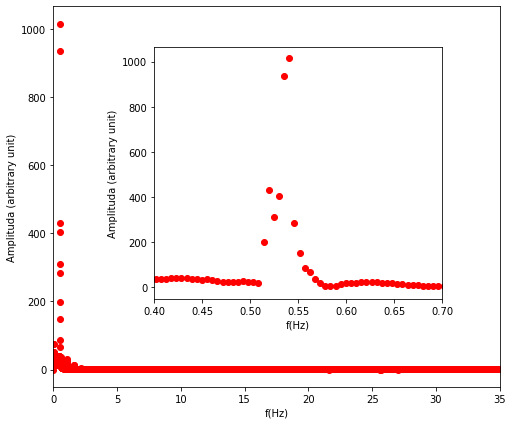

In [22]:
time1, red_ready, blue_ready = read_and_smooth("udarni_prozivoljni_4.csv")

four, freqs, PDS = our_lord_and_saviour_fourier(time1, red_ready)

indeks = np.where(PDS > 600)
temp1, temp2 = 2 * np.pi * abs(freqs[indeks][0]), 2 * np.pi * abs(freqs[indeks][1])
frekvencije_duo.append([temp1, temp2])
delta.append(abs(temp2-temp1))

fig, ax = plt.subplots(figsize=[8,7])

plt.scatter(freqs, PDS, color = "red")
plt.xlim(0, 35)
plt.xlabel("f(Hz)")
plt.ylabel("Amplituda (arbitrary unit)")

sub_axes = plt.axes([.3, .3, .5, .5]) 
sub_axes.scatter(freqs, PDS, color = "red") 

sub_axes.set_xlim(0.4, 0.7)
sub_axes.set_xlabel("f(Hz)")
sub_axes.set_ylabel("Amplituda (arbitrary unit)")

#plt.savefig("Udari1.png")

Text(0, 0.5, 'Amplituda (arbitrary unit)')

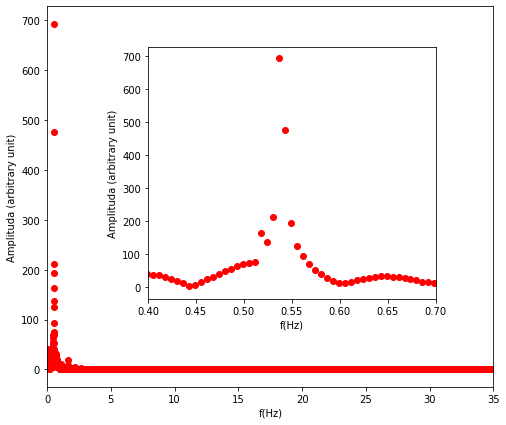

In [23]:
time1, red_ready, blue_ready = read_and_smooth("udarni_prozivoljni_5.csv")

four, freqs, PDS = our_lord_and_saviour_fourier(time1, red_ready)

indeks = np.where(PDS > 400)
temp1, temp2 = 2 * np.pi * abs(freqs[indeks][0]), 2 * np.pi * abs(freqs[indeks][1])
frekvencije_duo.append([temp1, temp2])
delta.append(abs(temp2-temp1))

fig, ax = plt.subplots(figsize=[8,7])

plt.scatter(freqs, PDS, color = "red")
plt.xlim(0, 35)
plt.xlabel("f(Hz)")
plt.ylabel("Amplituda (arbitrary unit)")

sub_axes = plt.axes([.3, .3, .5, .5]) 
sub_axes.scatter(freqs, PDS, color = "red") 

sub_axes.set_xlim(0.4, 0.7)
sub_axes.set_xlabel("f(Hz)")
sub_axes.set_ylabel("Amplituda (arbitrary unit)")

#plt.savefig("Udari1.png")

In [24]:
frekvencije_duo, delta

([[3.3983559639662246, 3.3633213663995623],
  [3.3982684087420307, 3.364622186873298],
  [3.4092086771417605, 3.370022370507947]],
 [0.035034597566662384, 0.033646221868732784, 0.039186306633813395])

In [25]:
def fazANDpro(t, w1, w2, A, B, fi1, fi2):
    woof = A * np.cos(w1*t + fi1) 
    antiwoof = B * np.cos(w2*t + fi2) 
    
    return woof + antiwoof

In [36]:
time1, red_ready, blue_ready = read_and_smooth("udarni_prozivoljni_3.csv")

four, freqs, PDS = our_lord_and_saviour_fourier(time1, red_ready)
p0 =   3.398,3.3633, 1, 1, 1, 0
popt, pcov = curve_fit(fazANDpro, time1, red_ready, p0)

C:\Users\ProBook\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


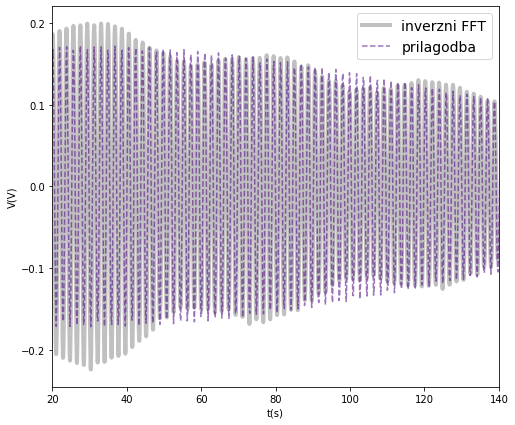

In [40]:
t = np.linspace(0, 175, 1000)


w1, w2, A, B, fi1, fi2 = popt


fig, ax = plt.subplots(figsize=[8,7])

plt.plot(time1, np.fft.ifft(four), color="silver", linewidth=4, label="inverzni FFT")
#plt.scatter(time1, red_ready, color="silver")
plt.plot(t, A * np.cos(w1*t + fi1) + B * np.cos(w2*t + fi2), linestyle = "--", color="indigo", alpha=0.54, label="prilagodba")

plt.legend(fontsize = 14)

plt.xlabel("t(s)")
plt.ylabel("V(V)")



plt.xlim(20, 140)

plt.savefig("ud_woof2.png")

In [38]:
w1, w2

(3.3896699701814814, 3.3688203373957233)